In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


path = kagglehub.dataset_download("gauthamp10/google-playstore-apps")

print("Path to dataset files:", path)

print(os.listdir(path))

# Convertir a dataframe
csv_file_path = os.path.join(path, 'Google-Playstore.csv')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
columnas = ['Nombre App', 'App Id', 'Categoria', 'Rating', 'Contador de Rating', 'Instalaciones', 'Instalaciones Minimas', 'Instalaciones Maximas', 'Gratis', 'Precio', 'Moneda', "Tamaño", "Version Android", "Id Desarrollador", 'Sitio del Desarrollador', 'Correo del Desarrollador', 'Liberada', 'Ultima Actualizacion', 'Contenido Rating', 'Politica de Privacidad', 'Soporte Publicitario',  'Compras en App', 'Eleccion de Editores', 'Tiempo']


df.columns = columnas

display(df.head())

Using Colab cache for faster access to the 'google-playstore-apps' dataset.
Path to dataset files: /kaggle/input/google-playstore-apps
['Google-Playstore.csv']


,Nombre App,App Id,Categoria,Rating,Contador de Rating,Instalaciones,Instalaciones Minimas,Instalaciones Maximas,Gratis,Precio,...,Sitio del Desarrollador,Correo del Desarrollador,Liberada,Ultima Actualizacion,Contenido Rating,Politica de Privacidad,Soporte Publicitario,Compras en App,Eleccion de Editores,Tiempo
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [2]:
primer_filtro = df.sort_values('Rating', ascending=False)[['Nombre App', 'Categoria', 'Rating', 'Contador de Rating', 'Instalaciones', 'Gratis']]
display(primer_filtro)



,Nombre App,Categoria,Rating,Contador de Rating,Instalaciones,Gratis
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,True
2312943,Biliyor Musun - Sonsuz Yarış,Trivia,5.0,12.0,100+,True
825849,HB Hockey,Sports,5.0,9.0,500+,True
825786,"Somtechweb :Website, Graphics, DataEntry,Anima...",Art & Design,5.0,12.0,10+,True
825799,"PicTrip - Keşfet, Paylaş ve Öner",Social,5.0,7.0,50+,True
...,...,...,...,...,...,...
2312553,Merlins Idle Apelsin,Simulation,NaN,NaN,10+,True
2312712,Joule Mobile App,Productivity,NaN,NaN,100+,True
2312751,Iris Profissional,Health & Fitness,NaN,NaN,50+,True
2312764,Wool Sort Puzzle,Puzzle,NaN,NaN,"10,000+",True


In [3]:
df_clean = df[df['Rating'].notna()].copy()

# Convertimos la columna 'Liberada' a datetime para análisis temporal
df_clean['Liberada'] = pd.to_datetime(df_clean['Liberada'], errors='coerce')

# Filtrado de apps con un numero significativo de ratings
df_significativo = df_clean[df_clean['Contador de Rating'] > 1000]

print(f"Total de apps después de filtrar: {len(df_significativo)}")
print(f"Apps originales: {len(df)}")

Total de apps después de filtrar: 135740
Apps originales: 2312944


/tmp/ipython-input-1910950556.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_cat, x='Rating', y='Categoria', palette='viridis')


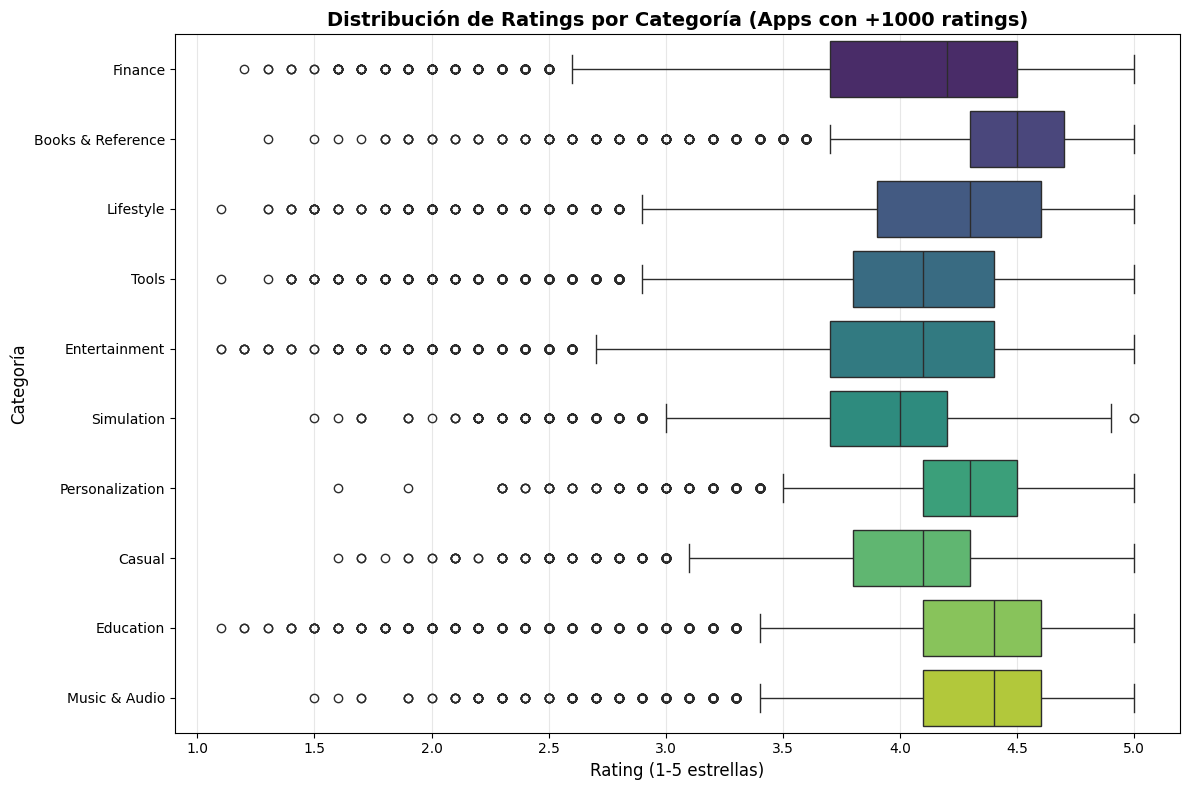


RESUMEN ESTADÍSTICO POR CATEGORÍA:

📱 Tools:
   • Apps analizadas: 11,011
   • Rating mediana: 4.10
   • Rating promedio: 4.03
   • Mejor app: 5.00
   • Peor app: 1.10
   • Consistencia (std): 0.54

📱 Entertainment:
   • Apps analizadas: 8,854
   • Rating mediana: 4.10
   • Rating promedio: 3.96
   • Mejor app: 5.00
   • Peor app: 1.10
   • Consistencia (std): 0.58

📱 Education:
   • Apps analizadas: 7,632
   • Rating mediana: 4.40
   • Rating promedio: 4.24
   • Mejor app: 5.00
   • Peor app: 1.10
   • Consistencia (std): 0.55

📱 Personalization:
   • Apps analizadas: 6,436
   • Rating mediana: 4.30
   • Rating promedio: 4.23
   • Mejor app: 5.00
   • Peor app: 1.60
   • Consistencia (std): 0.37

📱 Simulation:
   • Apps analizadas: 6,117
   • Rating mediana: 4.00
   • Rating promedio: 3.94
   • Mejor app: 5.00
   • Peor app: 1.50
   • Consistencia (std): 0.45


In [4]:
plt.figure(figsize=(12, 8))
top_categorias = df_significativo['Categoria'].value_counts().head(10).index
df_top_cat = df_significativo[df_significativo['Categoria'].isin(top_categorias)]

# Crear boxplot para ver distribución de ratings por categoría
sns.boxplot(data=df_top_cat, x='Rating', y='Categoria', palette='viridis')
plt.title('Distribución de Ratings por Categoría (Apps con +1000 ratings)', fontsize=14, fontweight='bold')
plt.xlabel('Rating (1-5 estrellas)', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas resumidas para el análisis
print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO POR CATEGORÍA:")
print("="*80)

for categoria in top_categorias[:5]:  # Mostrar solo top 5 para no saturar
    cat_data = df_top_cat[df_top_cat['Categoria'] == categoria]['Rating']
    print(f"\n📱 {categoria}:")
    print(f"   • Apps analizadas: {len(cat_data):,}")
    print(f"   • Rating mediana: {cat_data.median():.2f}")
    print(f"   • Rating promedio: {cat_data.mean():.2f}")
    print(f"   • Mejor app: {cat_data.max():.2f}")
    print(f"   • Peor app: {cat_data.min():.2f}")
    print(f"   • Consistencia (std): {cat_data.std():.2f}")



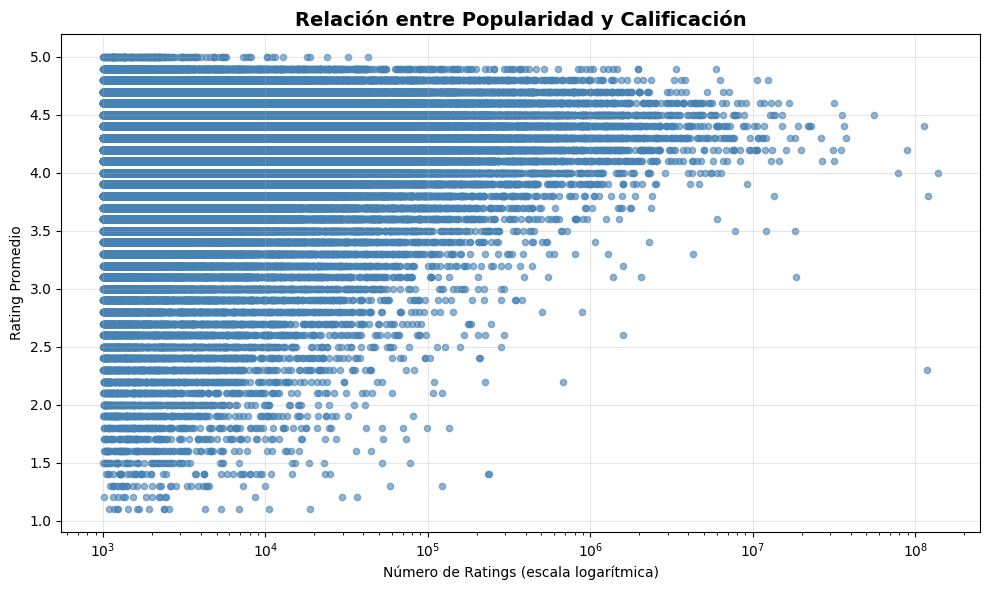

In [5]:
plt.figure(figsize=(10, 6))

# Escala logaritmica por la variacion alta
plt.scatter(df_significativo['Contador de Rating'],
           df_significativo['Rating'],
           alpha=0.6,
           c='steelblue',
           s=20)

plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.xlabel('Número de Ratings (escala logarítmica)', fontsize=10)
plt.ylabel('Rating Promedio', fontsize=10)
plt.title('Relación entre Popularidad y Calificación', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

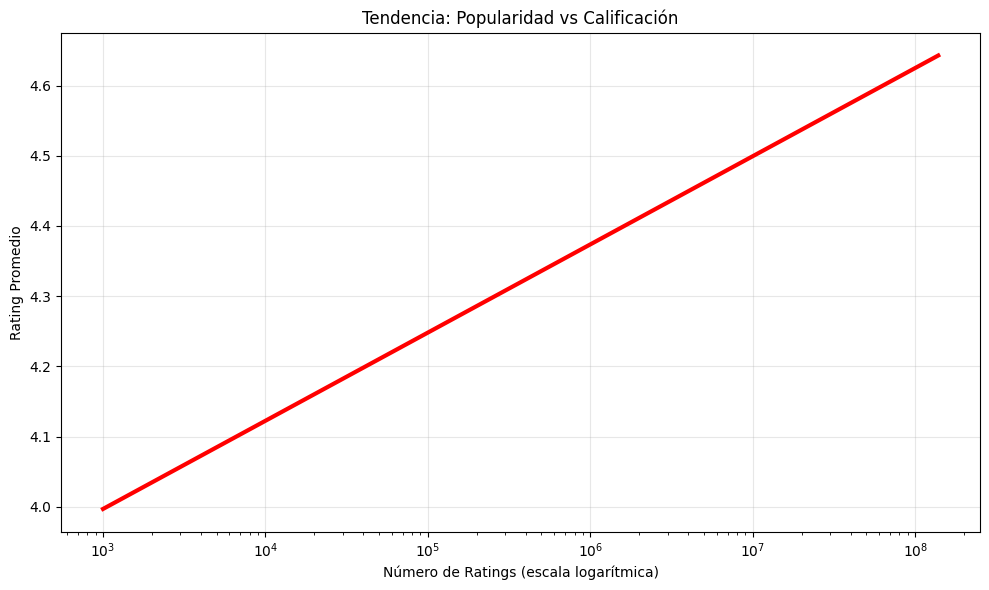


EXPLICACIÓN:
La línea muestra la tendencia general entre popularidad y calidad.
Pendiente: 0.055
✅ Las apps más populares tienden a tener MEJORES calificaciones


In [8]:
# GRÁFICO SIMPLE DE LÍNEA DE TENDENCIA
plt.figure(figsize=(10, 6))

# Calcular línea de tendencia
z = np.polyfit(np.log(df_significativo['Contador de Rating']), df_significativo['Rating'], 1)
p = np.poly1d(z)

# Crear puntos para la línea
x_linea = np.logspace(np.log10(df_significativo['Contador de Rating'].min()),
                      np.log10(df_significativo['Contador de Rating'].max()),
                      100)
y_linea = p(np.log(x_linea))

plt.plot(x_linea, y_linea, "red", linewidth=3)

plt.xscale('log')
plt.xlabel('Número de Ratings (escala logarítmica)')
plt.ylabel('Rating Promedio')
plt.title('Tendencia: Popularidad vs Calificación')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Explicación simple
pendiente = z[0]
print(f"\nEXPLICACIÓN:")
print(f"La línea muestra la tendencia general entre popularidad y calidad.")
print(f"Pendiente: {pendiente:.3f}")

if pendiente > 0:
    print("✅ Las apps más populares tienden a tener MEJORES calificaciones")
else:
    print("❌ Las apps más populares tienden a tener PEORES calificaciones")